In [1]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Convert the dataset into a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/telco_customer_churn.csv")

#View the first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Convert TotalCharges column to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

#Fill in null values with the average total charges 
df["TotalCharges"].fillna(np.mean(df["TotalCharges"]),inplace=True)

#Change the SeniorCitizen column to categorical
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:"Yes",0:"No"})

#Check the summary statistics for the numeric columns
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


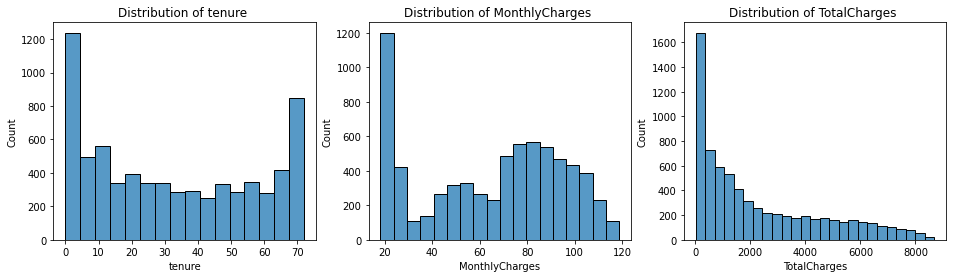

In [5]:
#Create a subplots object with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=[16,4])

#Iterate through the sub plots and plot a histogram for each column
for i, col in enumerate(["tenure","MonthlyCharges","TotalCharges"]):
  sns.histplot(df[col],ax=axes[i]).set_title(f"Distribution of {col} ")

Text(0.5, 1.0, 'Correlation of tenure, MonthlyCharges and TotalCharges')

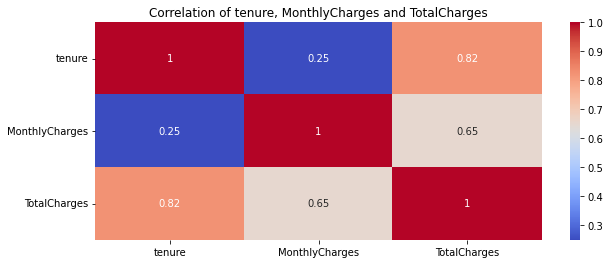

In [6]:
#Create a correlation matrix
corr = df[["tenure","MonthlyCharges","TotalCharges"]].corr()

#create a heatmap from the matrix
plt.figure(figsize=[10,4])
sns.heatmap(corr,cmap="coolwarm",annot=True).set_title("Correlation of tenure, MonthlyCharges and TotalCharges")

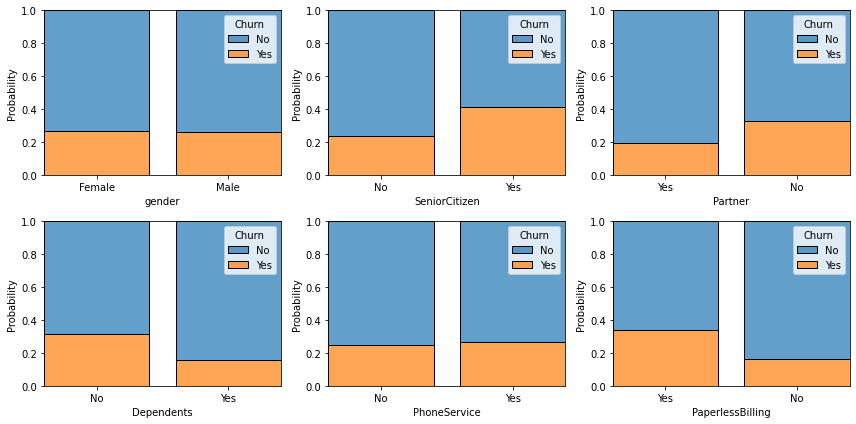

In [7]:
#Create a list object with names of all binary categorical columns
bin_categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService','PaperlessBilling']

#Create a subplots object with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=[12,6])

#Iterate through the sub plots and plot a histogram for each column
for col,ax in zip(bin_categorical_cols,axes.ravel()):
  sns.histplot(df,x=col, hue="Churn",ax=ax,stat="probability", multiple="fill", shrink=.8,alpha=0.7)

#Space out the plots
plt.tight_layout()

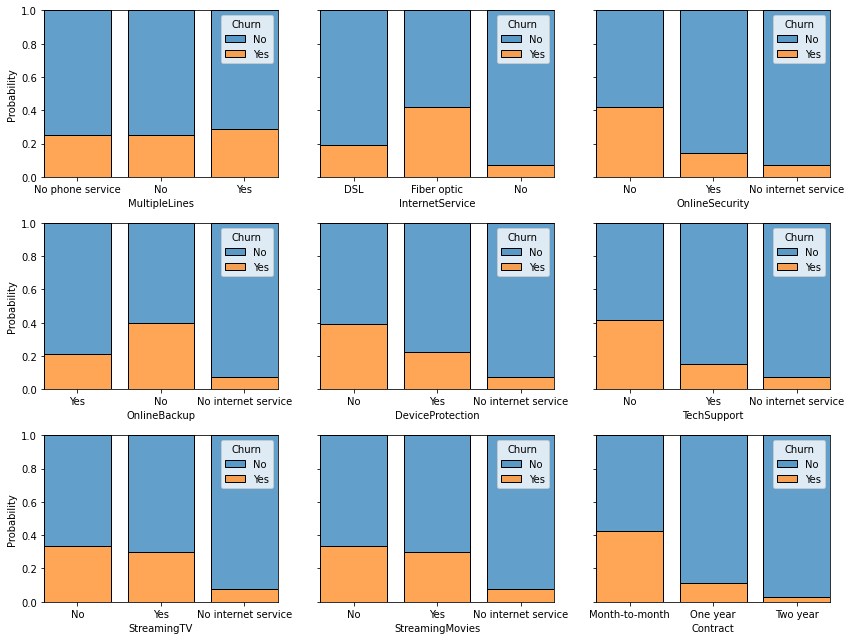

In [8]:
#Create a list object with names of all ternary categorical columns
tri_categorical_cols = ['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract']

#Create a subplots object with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=[12,9],sharey=True)

#Iterate through the sub plots and plot a histogram for each column
for col,ax in zip(tri_categorical_cols,axes.ravel()):
  sns.histplot(df,x=col, hue="Churn",ax=ax,stat="probability", multiple="fill", shrink=.8,alpha=0.7)

#Space out the plots
plt.tight_layout()


In [9]:
#Remove the customerID, gender and PhoneService columns
df.drop(columns=["customerID","gender","PhoneService"],axis=1,inplace=True)

#Split data into dependent(y) and independent variables(X)
X = df.drop("Churn",axis=1)
y = df["Churn"]

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [15]:
#Buid a decision tree model
tree_model = DecisionTreeClassifier()

#One hot encode the training data
X_train_encoded = pd.get_dummies(X_train,drop_first=True)

#Fit the training data to the model
tree_model.fit(X_train_encoded,y_train)

DecisionTreeClassifier()

In [16]:
#One hot encode the test data
X_test_encoded = pd.get_dummies(X_test,drop_first=True)

#Run predictions with the model using the encoded test data
predictions = tree_model.predict(X_test_encoded)

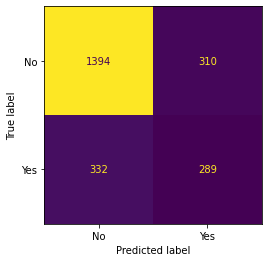

In [17]:
#Visualize the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions,colorbar=False)
plt.show()

In [18]:
#Print the classification report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

          No       0.81      0.82      0.81      1704
         Yes       0.48      0.47      0.47       621

    accuracy                           0.72      2325
   macro avg       0.65      0.64      0.64      2325
weighted avg       0.72      0.72      0.72      2325



In [21]:
#Build the random forest model
rf_model = RandomForestClassifier()

#Fit the the training data to the model
rf_model.fit(X_train_encoded,y_train)

#Run predictions with the model
rf_predictions = rf_model.predict(X_test_encoded)

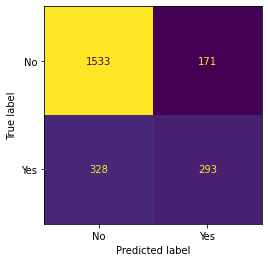

In [22]:
#Print the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions,colorbar=False)
plt.show()

In [23]:
#Print the classification report 
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1704
         Yes       0.63      0.47      0.54       621

    accuracy                           0.79      2325
   macro avg       0.73      0.69      0.70      2325
weighted avg       0.77      0.79      0.77      2325

